# Capstone: Exploratory Data Analysis of Payment Transactions and Users Demographics

## 1️⃣ Project Title and Introduction:

**Title:** User Demographics and Behavioral Insights in the US Payment System

This project analyzes transactional and user data from a U.S. payment system to uncover purchasing behaviors and demographic trends. The goal is to extract actionable insights that can help businesses in the United States enhance user engagement strategies, personalize marketing efforts, and make more informed, data-driven decisions.

## 2️⃣ Scoping Your Data Analysis Project

Big questions:
- Which type of payment method drive spending, and how does age affect this?
- How do the day of the week and the month affect user spending behavior?
- What insights can be drawn to improve targeting and retention across different user segments?

Datasets Used:
- user_dataset.csv: Includes user demographic and profile data (id, current_age, gender, yearly_income, total_debt, credit_score, num_credit_cards)
- transaction_dataset.csv: Includes transaction and payment behavior data (id, client_id, card_id, amount, date, use_chip, mcc, errors)

Relationships between Data Columns:
- Payment Method vs Spending & Age: Which payment types (swipe vs chip vs online) are linked to higher spending, and how preferences vary across age   groups.
- Date (Day/Month) vs Transaction Amount: Analyze when users spend the most by looking at daily and monthly patterns, useful for campaign timing and resource planning.
- Income Segments vs Spending Behavior: Helps identify high-frequency or high-value user groups for targeted campaigns.
- Financial Health by Segment: Identify stable vs high-risk user to prioritize retention or tailored offers.

## 3️⃣Data Preparation

### Data Cleaning:

- Handle missing values in both datasets (e.g., missing prices, order dates, or last visit dates).

- Standardize inconsistent data formats (e.g., dates, numeric values).




In [35]:
import pandas as pd
import numpy as np

# Load the datasets
transactions = pd.read_csv('transactions_data.csv')
users = pd.read_csv('users_data.csv')

In [36]:
users.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


In [37]:
users.shape

(2000, 14)

In [38]:
# Check missing values by column
missing_values = users.isnull().sum()

print("Missing values in sers dataset:")
print(missing_values)

Missing values in sers dataset:
id                   0
current_age          0
retirement_age       0
birth_year           0
birth_month          0
gender               0
address              0
latitude             0
longitude            0
per_capita_income    0
yearly_income        0
total_debt           0
credit_score         0
num_credit_cards     0
dtype: int64


In [39]:
transactions.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN


In [40]:
transactions.shape

(13305915, 12)

In [41]:
# Check missing values by column
missing_values = transactions.isnull().sum()

print("Missing values in transactions dataset:")
print(missing_values)

Missing values in transactions dataset:
id                       0
date                     0
client_id                0
card_id                  0
amount                   0
use_chip                 0
merchant_id              0
merchant_city            0
merchant_state     1563700
zip                1652706
mcc                      0
errors            13094522
dtype: int64


#### A. Handling missing values

In [45]:
# Handle Missing Values: Removal 
users # no missing value
transactions # unable to removal missing value as it delete online transaction under 'use_chip'

# Handle Missing Values: Imputation
# Create a clean copy from transactions
transactions2 = transactions.copy()

# Impute missing values safely
transactions2.loc[:, 'errors'] = transactions2['errors'].fillna('no_error')
transactions2.loc[:, 'merchant_state'] = transactions2['merchant_state'].fillna('online')
transactions2.loc[:, 'zip'] = transactions2['zip'].fillna(0)
transactions2['zip'] = transactions2['zip'].astype(int)

# Check remaining missing values
print("Missing values after cleaning (transactions2):")
print(transactions2.isnull().sum())

print("Cleaned Data Shape:", transactions2.shape)


Missing values after cleaning (transactions2):
id                0
date              0
client_id         0
card_id           0
amount            0
use_chip          0
merchant_id       0
merchant_city     0
merchant_state    0
zip               0
mcc               0
errors            0
dtype: int64
Cleaned Data Shape: (13305915, 12)


In [46]:
transactions['use_chip'].unique()

array(['Swipe Transaction', 'Online Transaction', 'Chip Transaction'],
      dtype=object)

In [47]:
users.info()
transactions2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-null   object 
 11  total_debt         2000 non-null   object 
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 218.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 en

##### Missing values has been either removed or imputed

#### B. Identifying & Removing Duplicates

In [48]:
#1. 
duplicates = users.duplicated().sum()
print(f"Numbers of duplicate row users dataset: {duplicates}")

if duplicates > 0:
    print("Duplicate rows found:") 
    display(users[user.duplicated(keep=False)])


Numbers of duplicate row users dataset: 0


In [49]:
#2.
duplicates = transactions2.duplicated().sum()
print(f"Numbers of duplicate row users dataset: {duplicates}")

if duplicates > 0:
    print("Duplicate rows found:") 
    display(transactions2[transactions2.duplicated(keep=False)])



Numbers of duplicate row users dataset: 0


##### No duplicates found in both user & transaction dataset

#### C. Standardize inconsistent data

##### Remove '$' from amount column

In [50]:
# 1. Remove "$" sign from the 'amount' column and convert to float
transactions2['amount'] = transactions2['amount'].replace('[\$,]', '', regex=True).astype(float)

# 2. Verify the changes
print("Transaction Dataset After Removing $ and Converting to Float:")
print(transactions2[['amount']].head())


Transaction Dataset After Removing $ and Converting to Float:
   amount
0  -77.00
1   14.57
2   80.00
3  200.00
4   46.41


In [51]:
# 2. Remove "$" from the user dataset
cols_to_clean = ['per_capita_income', 'yearly_income', 'total_debt']

# Remove "$" and convert to float for each column
for col in cols_to_clean:
    users[col] = users[col].replace({'\$': ''}, regex=True).astype(float)
    
# Verify the changes
print("Users Dataset After Removing $ and Converting to Float:")
print(users.head())

Users Dataset After Removing $ and Converting to Float:
     id  current_age  retirement_age  birth_year  birth_month  gender  \
0   825           53              66        1966           11  Female   
1  1746           53              68        1966           12  Female   
2  1718           81              67        1938           11  Female   
3   708           63              63        1957            1  Female   
4  1164           43              70        1976            9    Male   

                    address  latitude  longitude  per_capita_income  \
0             462 Rose Lane     34.15    -117.76            29278.0   
1    3606 Federal Boulevard     40.76     -73.74            37891.0   
2           766 Third Drive     34.02    -117.89            22681.0   
3          3 Madison Street     40.71     -73.99           163145.0   
4  9620 Valley Stream Drive     37.76    -122.44            53797.0   

   yearly_income  total_debt  credit_score  num_credit_cards  
0        59696.

In [52]:
# Process Transaction dataset
#convert date variable to datetime datatype
transactions2['date'] = pd.to_datetime(transactions2['date'], errors='coerce')  # Convert to datetime

print("Transaction Dataset After Processing:")
print(transactions2.head())

Transaction Dataset After Processing:
        id                date  client_id  card_id  amount           use_chip  \
0  7475327 2010-01-01 00:01:00       1556     2972  -77.00  Swipe Transaction   
1  7475328 2010-01-01 00:02:00        561     4575   14.57  Swipe Transaction   
2  7475329 2010-01-01 00:02:00       1129      102   80.00  Swipe Transaction   
3  7475331 2010-01-01 00:05:00        430     2860  200.00  Swipe Transaction   
4  7475332 2010-01-01 00:06:00        848     3915   46.41  Swipe Transaction   

   merchant_id merchant_city merchant_state    zip   mcc    errors  
0        59935        Beulah             ND  58523  5499  no_error  
1        67570    Bettendorf             IA  52722  5311  no_error  
2        27092         Vista             CA  92084  4829  no_error  
3        27092   Crown Point             IN  46307  4829  no_error  
4        13051       Harwood             MD  20776  5813  no_error  


In [53]:
# Renaming column to appropiate name

transactions3 = transactions2.rename(columns={
    'amount': 'transaction_amount',
    'use_chip': 'transaction_type',
    'date': 'date_time',
})

users.rename(columns={'current_age': 'age'}, inplace=True)

print(transactions3.head())
print(users.head())

        id           date_time  client_id  card_id  transaction_amount  \
0  7475327 2010-01-01 00:01:00       1556     2972              -77.00   
1  7475328 2010-01-01 00:02:00        561     4575               14.57   
2  7475329 2010-01-01 00:02:00       1129      102               80.00   
3  7475331 2010-01-01 00:05:00        430     2860              200.00   
4  7475332 2010-01-01 00:06:00        848     3915               46.41   

    transaction_type  merchant_id merchant_city merchant_state    zip   mcc  \
0  Swipe Transaction        59935        Beulah             ND  58523  5499   
1  Swipe Transaction        67570    Bettendorf             IA  52722  5311   
2  Swipe Transaction        27092         Vista             CA  92084  4829   
3  Swipe Transaction        27092   Crown Point             IN  46307  4829   
4  Swipe Transaction        13051       Harwood             MD  20776  5813   

     errors  
0  no_error  
1  no_error  
2  no_error  
3  no_error  
4  no_erro

In [54]:
print("Earliest date:", transactions3['date_time'].min())
print("Latest date:", transactions3['date_time'].max())

Earliest date: 2010-01-01 00:01:00
Latest date: 2019-10-31 23:59:00


### Data Manipulation & Data Transformation:

- Extract useful date-based features
- Categorize user based on yearly income by quartiles.
- Categorize user based on age.
- Categorize debt level based on debt.
- Categorical types for relevant columns.




In [55]:
# Extract useful date-based features
transactions3['Year'] = transactions3['date_time'].dt.year
transactions3['Month'] = transactions3['date_time'].dt.month
transactions3['Day'] = transactions3['date_time'].dt.day
transactions3['Day_of_Week'] = transactions3['date_time'].dt.day_name()

# Display the transformed dataset
transactions3[['date_time', 'Year', 'Month', 'Day', 'Day_of_Week']].head()


,date_time,Year,Month,Day,Day_of_Week
0,2010-01-01 00:01:00,2010,1,1,Friday
1,2010-01-01 00:02:00,2010,1,1,Friday
2,2010-01-01 00:02:00,2010,1,1,Friday
3,2010-01-01 00:05:00,2010,1,1,Friday
4,2010-01-01 00:06:00,2010,1,1,Friday


In [56]:
# Debt level using quartiles
print(users['total_debt'].describe())

count      2000.000000
mean      63709.694000
std       52254.453421
min           0.000000
25%       23986.750000
50%       58251.000000
75%       89070.500000
max      516263.000000
Name: total_debt, dtype: float64


In [57]:
# Set thresholds from your data
low_thresh = 23986.75
mid_thresh = 58251.0
high_thresh = 89070.5

# Categorize based on thresholds
def categorize_debt(debt):
    if debt <= low_thresh:
        return 'Low Debt'
    elif debt <= mid_thresh:
        return 'Moderate Debt'
    elif debt <= high_thresh:
        return 'High Debt'
    else:
        return 'Very High Debt'

users['debt_category'] = users['total_debt'].apply(categorize_debt)


In [58]:
# Define bins and labels suitable for ages 23–100
bins = [20, 30, 40, 50, 60, 70, float('inf')]
labels = ['A=20-29', 'B=30-39', 'C=40-49', 'D=50-59', 'E=60-69', 'F=70+']

# Apply categorization
users['age_group'] = pd.cut(users['age'], bins=bins, labels=labels, right=False)


In [59]:
# Ensure numeric types
users['yearly_income'] = users['yearly_income'].astype(float)
users['total_debt'] = users['total_debt'].astype(float)
users['credit_score'] = users['credit_score'].astype(int)



In [60]:
# Ensure categorical types for relevant columns
users['age_group'] = users['age_group'].astype('category')
users['gender'] = users['gender'].astype('category')

transactions3['transaction_type'] = transactions3['transaction_type'].astype('category')
transactions3['Day_of_Week'] = transactions3['Day_of_Week'].astype('category')

# Verify changes
print(transactions3.dtypes[['Day_of_Week', 'transaction_type']])

Day_of_Week         category
transaction_type    category
dtype: object


In [61]:
# Check for negative transaction amounts
invalid_amounts = transactions3[transactions3['transaction_amount'] < 0]
print(f"Invalid transactions (negative amounts): {len(invalid_amounts)}")

# Create a cleaned transactions DataFrame with only non-negative amounts
transactions4 = transactions3[transactions3['transaction_amount'] >= 0].copy()

# Check for negative total debt
invalid_debt = users[users['total_debt'] < 0]
print(f"Invalid debt entries (negative debt): {len(invalid_debt)}")

# Remove negative debt values
users2 = users[users['total_debt'] >= 0]



Invalid transactions (negative amounts): 660049
Invalid debt entries (negative debt): 0


In [62]:
transactions4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12645866 entries, 1 to 13305914
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   id                  int64         
 1   date_time           datetime64[ns]
 2   client_id           int64         
 3   card_id             int64         
 4   transaction_amount  float64       
 5   transaction_type    category      
 6   merchant_id         int64         
 7   merchant_city       object        
 8   merchant_state      object        
 9   zip                 int64         
 10  mcc                 int64         
 11  errors              object        
 12  Year                int32         
 13  Month               int32         
 14  Day                 int32         
 15  Day_of_Week         category      
dtypes: category(2), datetime64[ns](1), float64(1), int32(3), int64(6), object(3)
memory usage: 1.3+ GB


In [63]:
users2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 2000 non-null   int64   
 1   age                2000 non-null   int64   
 2   retirement_age     2000 non-null   int64   
 3   birth_year         2000 non-null   int64   
 4   birth_month        2000 non-null   int64   
 5   gender             2000 non-null   category
 6   address            2000 non-null   object  
 7   latitude           2000 non-null   float64 
 8   longitude          2000 non-null   float64 
 9   per_capita_income  2000 non-null   float64 
 10  yearly_income      2000 non-null   float64 
 11  total_debt         2000 non-null   float64 
 12  credit_score       2000 non-null   int64   
 13  num_credit_cards   2000 non-null   int64   
 14  debt_category      2000 non-null   object  
 15  age_group          1889 non-null   category
dtypes: cat

### Data Merging:

- Join the "transaction" dataset with the "users" dataset using Cilent ID from Transaction & ID from User as the key.



In [64]:
# Merge transaction data with user data on 'client_id'
merged_df = transactions4.merge(users2, left_on="client_id", right_on="id", how="left")

# Check the merged result
print("Merged Dataset::")
print(merged_df.head())

Merged Dataset::
      id_x           date_time  client_id  card_id  transaction_amount  \
0  7475328 2010-01-01 00:02:00        561     4575               14.57   
1  7475329 2010-01-01 00:02:00       1129      102               80.00   
2  7475331 2010-01-01 00:05:00        430     2860              200.00   
3  7475332 2010-01-01 00:06:00        848     3915               46.41   
4  7475333 2010-01-01 00:07:00       1807      165                4.81   

    transaction_type  merchant_id merchant_city merchant_state    zip  ...  \
0  Swipe Transaction        67570    Bettendorf             IA  52722  ...   
1  Swipe Transaction        27092         Vista             CA  92084  ...   
2  Swipe Transaction        27092   Crown Point             IN  46307  ...   
3  Swipe Transaction        13051       Harwood             MD  20776  ...   
4  Swipe Transaction        20519         Bronx             NY  10464  ...   

              address latitude  longitude  per_capita_income  yearly_

In [65]:
# Drop transaction and duplicate user ID columns
merged_df = merged_df.drop(columns=['id_x', 'id_y'])

# Rename for clarity (optional but recommended)
merged_df = merged_df.rename(columns={'client_id': 'customer_id'})

In [66]:
# Check for transactions that failed to match with user data
missing_users = merged_df[merged_df['yearly_income'].isnull()]
print(f"Transactions without user info: {len(missing_users)}")


Transactions without user info: 0


In [67]:
# Check for all missing values in the merged dataset (any column)
print("Missing values after merge:")
print(merged_df.isnull().sum())


Missing values after merge:
date_time             0
customer_id           0
card_id               0
transaction_amount    0
transaction_type      0
merchant_id           0
merchant_city         0
merchant_state        0
zip                   0
mcc                   0
errors                0
Year                  0
Month                 0
Day                   0
Day_of_Week           0
age                   0
retirement_age        0
birth_year            0
birth_month           0
gender                0
address               0
latitude              0
longitude             0
per_capita_income     0
yearly_income         0
total_debt            0
credit_score          0
num_credit_cards      0
debt_category         0
age_group             0
dtype: int64


In [68]:
print(merged_df.dtypes)

date_time             datetime64[ns]
customer_id                    int64
card_id                        int64
transaction_amount           float64
transaction_type            category
merchant_id                    int64
merchant_city                 object
merchant_state                object
zip                            int64
mcc                            int64
errors                        object
Year                           int32
Month                          int32
Day                            int32
Day_of_Week                 category
age                            int64
retirement_age                 int64
birth_year                     int64
birth_month                    int64
gender                      category
address                       object
latitude                     float64
longitude                    float64
per_capita_income            float64
yearly_income                float64
total_debt                   float64
credit_score                   int64
n

In [69]:
merged_df['transaction_type'].unique()

['Swipe Transaction', 'Online Transaction', 'Chip Transaction']
Categories (3, object): ['Chip Transaction', 'Online Transaction', 'Swipe Transaction']

In [198]:
# Save to CSV 
merged_df.to_csv("merged_df", index=False)

### Exploratory Data Analysis (EDA):

- Performed descriptive statistical analysis to understand key features such as users age, yearly income, total debt, and transaction amounts.
- Dropped identifier and non-analytical columns to focus the analysis on meaningful numerical features.
- Used .groupby() to segment and analyze data by categories such as income_class, transaction_type, and age_group to uncover patterns in users behavior and spending.
- Visualized distributions and relationships using histograms and boxplots (e.g., age distribution, spending by income level) to identify trends, outliers, and insights.
- Any minor modification to dataset if necessary to avoid or compliment data analysis

In [3]:
merged_df = pd.read_csv('merged_df.csv')

In [4]:
# 1. Drop identifier 
merged2_df = merged_df.drop(columns=[
    'latitude', 'longitude', 'zip', 'address',
    'merchant_city', 'merchant_state', 'merchant_id',
    'mcc', 'card_id', 'retirement_age'
])

# 2. Keep only numeric columns
numberical_columns = merged2_df.select_dtypes(include='number') 

# 3. Get summary statistics
numberical_summmary = numberical_columns.describe()

# 4. Display the results
print("Desciptive statistics for numberical variables:")
print(numberical_summmary)


Desciptive statistics for numberical variables:
        customer_id  transaction_amount          Year         Month  \
count  1.264587e+07        1.264587e+07  1.264587e+07  1.264587e+07   
mean   1.027144e+03        5.055839e+01  2.014522e+03  6.454430e+00   
std    5.807067e+02        7.402685e+01  2.813704e+00  3.411414e+00   
min    0.000000e+00        0.000000e+00  2.010000e+03  1.000000e+00   
25%    5.200000e+02        1.104000e+01  2.012000e+03  4.000000e+00   
50%    1.072000e+03        3.187000e+01  2.015000e+03  6.000000e+00   
75%    1.529000e+03        6.634000e+01  2.017000e+03  9.000000e+00   
max    1.998000e+03        6.820200e+03  2.019000e+03  1.200000e+01   

                Day           age    birth_year   birth_month  \
count  1.264587e+07  1.264587e+07  1.264587e+07  1.264587e+07   
mean   1.572050e+01  5.408356e+01  1.965099e+03  6.566720e+00   
std    8.795811e+00  1.575189e+01  1.574075e+01  3.606987e+00   
min    1.000000e+00  2.300000e+01  1.918000e+03  1.0

In [5]:
# Indentify categorical columns 
categorical_columns = merged_df.select_dtypes(include=['object', 'category']).columns

# Show unique categories and their frequencies
print("\nFrequency distribution for categorical variables:")
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(merged_df[col].value_counts())



Frequency distribution for categorical variables:

Column: date_time
date_time
2016-03-03 11:42:00    18
2018-07-18 09:38:00    17
2017-04-20 11:24:00    16
2016-12-05 12:48:00    16
2012-07-28 12:20:00    16
                       ..
2010-01-01 00:37:00     1
2019-10-31 23:26:00     1
2019-10-31 22:56:00     1
2010-01-01 00:49:00     1
2010-01-01 00:53:00     1
Name: count, Length: 4095302, dtype: int64

Column: transaction_type
transaction_type
Swipe Transaction     6578009
Chip Transaction      4516628
Online Transaction    1551229
Name: count, dtype: int64

Column: merchant_city
merchant_city
ONLINE           1554124
Houston           136011
Miami              83801
Brooklyn           79450
Los Angeles        78433
                  ...   
Mauckport              1
Grizzly Flats          1
Keswick                1
Haw River              1
Crouse                 1
Name: count, Length: 12492, dtype: int64

Column: merchant_state
merchant_state
online               1554124
CA         

In [6]:
# To properly analyze the data remove all fail transaction:
# Keep only rows where 'errors' == 'no_error'
merged2_df = merged2_df[merged2_df['errors'] == 'no_error'].copy()

# Check result
print("Remaining rows after dropping error transactions:", len(merged_df))
print("Unique values in 'errors' column:", merged2_df['errors'].unique())


Remaining rows after dropping error transactions: 12645866
Unique values in 'errors' column: ['no_error']


In [7]:
print(merged2_df['age_group'].value_counts())


age_group
C=40-49    3091344
D=50-59    2960887
B=30-39    2081857
F=70+      2071218
E=60-69    1956513
A=20-29     282197
Name: count, dtype: int64


In [8]:
# Rename 'Day_of_Week' to lowercase
merged2_df.rename(columns={'Day_of_Week': 'day_of_week'}, inplace=True)

# Verify
print(merged2_df.columns)

Index(['date_time', 'customer_id', 'transaction_amount', 'transaction_type',
       'errors', 'Year', 'Month', 'Day', 'day_of_week', 'age', 'birth_year',
       'birth_month', 'gender', 'per_capita_income', 'yearly_income',
       'total_debt', 'credit_score', 'num_credit_cards', 'debt_category',
       'income_level', 'age_group'],
      dtype='object')


In [10]:
# Ensure 'date_time' is in datetime format
merged2_df['date_time'] = pd.to_datetime(merged2_df['date_time'])

# Extract Year and Month Name into new columns
merged2_df['Year'] = merged2_df['date_time'].dt.year
merged2_df['month_name'] = merged2_df['date_time'].dt.month_name()

# Exclude all records from the year 2019
filtered_df = merged2_df[merged2_df['Year'] != 2019]


In [11]:
# Group by month_name
monthly_spending = filtered_df.groupby('month_name')['transaction_amount'].sum().reset_index()

# Ensure month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_spending['month_name'] = pd.Categorical(monthly_spending['month_name'], categories=month_order, ordered=True)
monthly_spending = monthly_spending.sort_values('month_name')


In [12]:
merged2_df['debt_to_income_ratio'] = merged2_df['total_debt'] / merged2_df['yearly_income']

In [13]:
# Define income bins (numeric only, no inequality signs)
bins = [0, 30000, 45000, 75000, 120000, np.inf]
labels = ['Low', 'Lower-Middle', 'Middle', 'Upper-Middle', 'High']

# Use pd.cut with right=True to include the upper bound (e.g., ≤ 30,000)
merged2_df['income_class'] = pd.cut(
    merged2_df['yearly_income'],
    bins=bins,
    labels=labels,
    right=True,       # ≤ upper bound
    include_lowest=True  # include the lowest value (e.g., 0)
)


### Segmented Aggregation or Analysis

- Used .groupby() (e.g., age, income, etc).

In [15]:
# Filter out abnormal yearly income
merged3_df = merged2_df[merged2_df['yearly_income'] > 5000]

print("Yearly Income:")
print(merged3_df['yearly_income'].describe())

Yearly Income:
count    1.237223e+07
mean     4.690581e+04
std      2.408016e+04
min      8.526000e+03
25%      3.292800e+04
50%      4.124900e+04
75%      5.412400e+04
max      2.801990e+05
Name: yearly_income, dtype: float64


In [14]:
# Group by age group and get average transaction amount
age_spending = merged3_df.groupby('age_group')['transaction_amount'].mean().sort_values(ascending=False)
print(age_spending)

age_group
B=30-39    52.524487
E=60-69    51.542455
D=50-59    51.056454
A=20-29    50.735087
C=40-49    49.123810
F=70+      48.705218
Name: transaction_amount, dtype: float64


In [15]:
# Analyze average transaction amount by income level
income_spending = merged3_df.groupby('income_class')['transaction_amount'].mean().sort_values(ascending=False)
print(income_spending)

income_class
High            84.431964
Upper-Middle    73.514209
Middle          56.057949
Lower-Middle    45.808277
Low             39.113244
Name: transaction_amount, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_3504\4219092983.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_spending = merged3_df.groupby('income_class')['transaction_amount'].mean().sort_values(ascending=False)


In [16]:
# Summary statistics
print("Yearly Income:")
print(merged3_df['yearly_income'].describe())

print("\nTransaction Amount:")
print(merged3_df['transaction_amount'].describe())


Yearly Income:
count    1.237223e+07
mean     4.690581e+04
std      2.408016e+04
min      8.526000e+03
25%      3.292800e+04
50%      4.124900e+04
75%      5.412400e+04
max      2.801990e+05
Name: yearly_income, dtype: float64

Transaction Amount:
count    1.237223e+07
mean     5.049890e+01
std      7.435297e+01
min      0.000000e+00
25%      1.103000e+01
50%      3.172000e+01
75%      6.600000e+01
max      6.820200e+03
Name: transaction_amount, dtype: float64


### Data Visualization:

- Generate preliminary visualizations to understand the distribution of key variables (e.g., age, transaction_amount, yearly_income, debt).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Bar Chart: Average Transaction Amount per Payment Method by Age Group


C:\Users\User\AppData\Local\Temp\ipykernel_18196\3494286480.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_df = merged3_df.groupby(['transaction_type', 'age_group'])['transaction_amount'].median().reset_index()
C:\Users\User\AppData\Local\Temp\ipykernel_18196\3494286480.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(


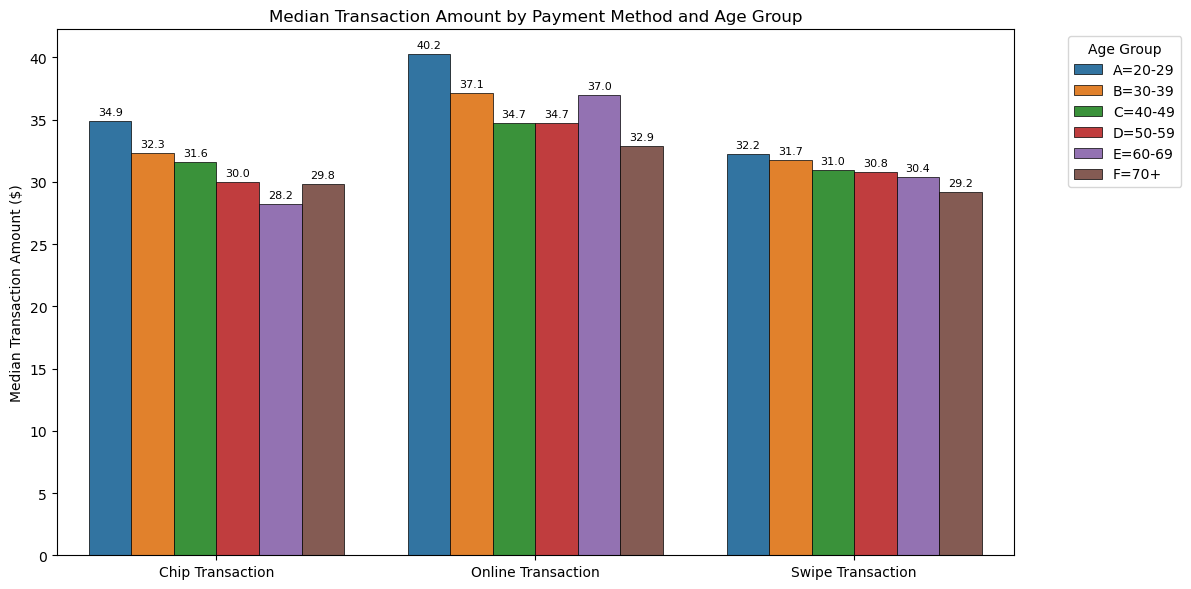

In [84]:
median_df = merged3_df.groupby(['transaction_type', 'age_group'])['transaction_amount'].median().reset_index()

plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=median_df,
    x='transaction_type',
    y='transaction_amount',
    hue='age_group',
    ci=None,
    edgecolor='black',
    linewidth=0.5
)

# Add value labels on top of bars
for p in barplot.patches:
    height = p.get_height()
    if height > 0.1:
        barplot.annotate(f'{height:.1f}',
                         (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='bottom',
                         fontsize=8, color='black', xytext=(0, 3),
                         textcoords='offset points')

plt.title('Median Transaction Amount by Payment Method and Age Group')
plt.xlabel('')
plt.ylabel('Median Transaction Amount ($)')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Line Chart: Day vs Transaction Amount


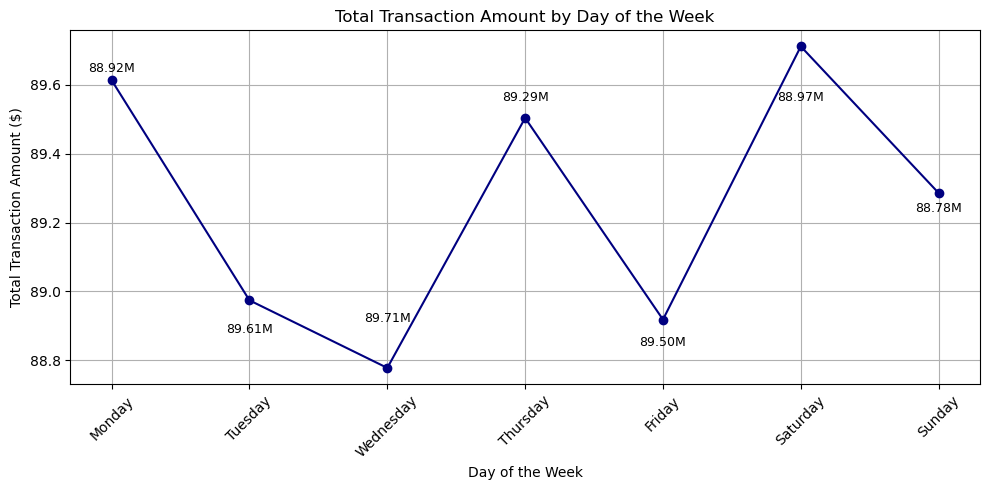

In [17]:
# Define manual label offsets as percentage of bar height
label_offsets = {
    'Monday':  -0.0083,
    'Tuesday': 0.0064,
    'Wednesday': 0.005,
    'Thursday': -0.0075, 
    'Friday': 0.008,
    'Saturday': -0.009,
    'Sunday': 0.0029,
}
# Aggregate first
day_df = merged3_df.groupby('day_of_week')['transaction_amount'].sum().reset_index()

# Sort to ensure correct day order if needed
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df['day_of_week'] = pd.Categorical(day_df['day_of_week'], categories=day_order, ordered=True)
day_df = day_df.sort_values('day_of_week')

# Plot Line Chart
plt.figure(figsize=(10,5))
plt.plot(day_df['day_of_week'], day_df['transaction_amount']/1e6, marker='o', color='navy')
plt.ylabel("Total Transaction Amount ($)")
plt.xlabel("Day of the Week")
plt.title("Total Transaction Amount by Day of the Week")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Add Value Labels with relative control
for i, row in day_df.iterrows():
    day = row['day_of_week']
    amount_mil = row['transaction_amount'] / 1e6
    
    y_offset_percent = label_offsets.get(day, 0.05)
    y_offset = amount_mil * y_offset_percent
    
    plt.text(i, amount_mil + y_offset, f"{amount_mil:.2f}M", ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8256\608247450.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_grouped = merged3_df.groupby(['age_group', 'day_of_week'])['transaction_amount'].mean().reset_index()


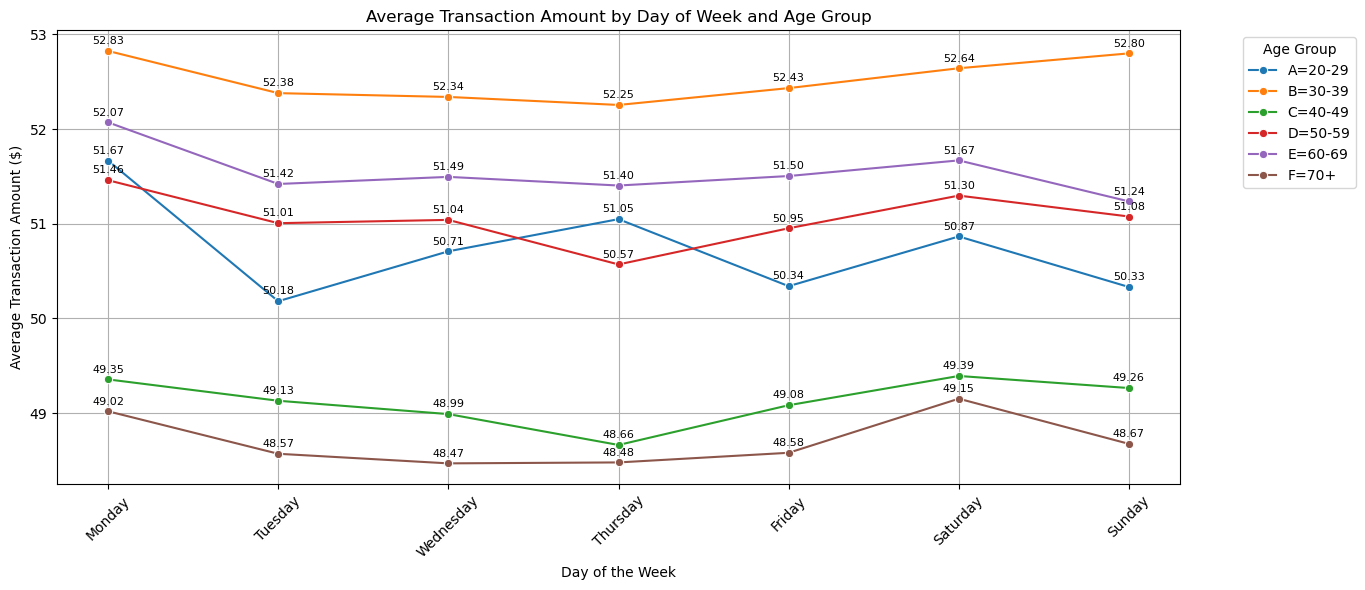

In [456]:
# Group the data correctly
avg_grouped = merged3_df.groupby(['age_group', 'day_of_week'])['transaction_amount'].mean().reset_index()

# Ensure day order is correct
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_grouped['day_of_week'] = pd.Categorical(avg_grouped['day_of_week'], categories=weekday_order, ordered=True)
avg_grouped = avg_grouped.sort_values(['age_group', 'day_of_week'])

# Plot Line Chart per Age Group
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_grouped, x='day_of_week', y='transaction_amount', hue='age_group', marker='o')

plt.title("Average Transaction Amount by Day of Week and Age Group")
plt.xlabel("Day of the Week")
plt.ylabel("Average Transaction Amount ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# --- Add labels for each data point ---
for age_group in avg_grouped['age_group'].unique():
    subset = avg_grouped[avg_grouped['age_group'] == age_group]
    
    for i, row in subset.iterrows():
        day_index = weekday_order.index(row['day_of_week'])
        amount = row['transaction_amount']
        
        plt.text(day_index, amount + 0.05, f"{amount:.2f}", 
                 ha='center', va='bottom', fontsize=8, color='black')

plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_10188\3422895317.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transaction_count = merged3_df.groupby('income_class')['transaction_amount'].count()
C:\Users\User\AppData\Local\Temp\ipykernel_10188\3422895317.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(transaction_count.index, rotation=45, fontsize=10)


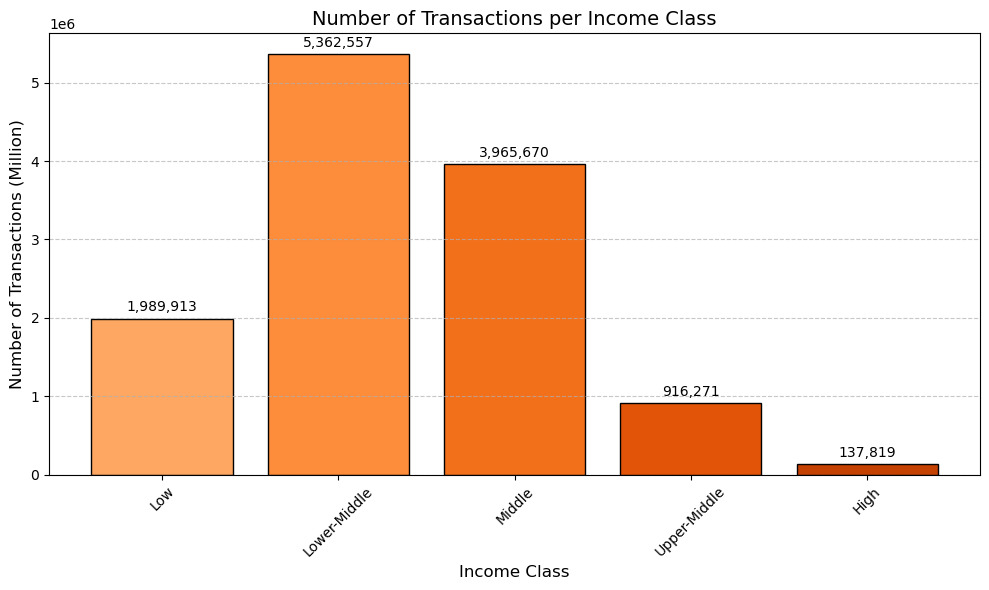

In [38]:
# Ensure income_level is ordered properly
income_order = ['Low', 'Lower-Middle', 'Middle', 'Upper-Middle', 'High']
merged3_df['income_class'] = pd.Categorical(merged3_df['income_class'], categories=income_order, ordered=True)

# Group by income level and count transactions (no sorting needed)
transaction_count = merged3_df.groupby('income_class')['transaction_amount'].count()

# Generate color gradient
colors = plt.cm.Oranges(np.linspace(0.4, 0.8, len(transaction_count)))

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(transaction_count.index, transaction_count.values, color=colors, edgecolor='black')

# Add labels and title
ax.set_title('Number of Transactions per Income Class', fontsize=14)
ax.set_xlabel('Income Class', fontsize=12)
ax.set_ylabel('Number of Transactions (Million)', fontsize=12)
ax.set_xticklabels(transaction_count.index, rotation=45, fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels above each bar
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(transaction_count.values) * 0.01,
        f'{int(height):,}',
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8256\1565651653.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_yearly_total = filtered_df.groupby(['Year', 'month_name'])['transaction_amount'].sum().reset_index()


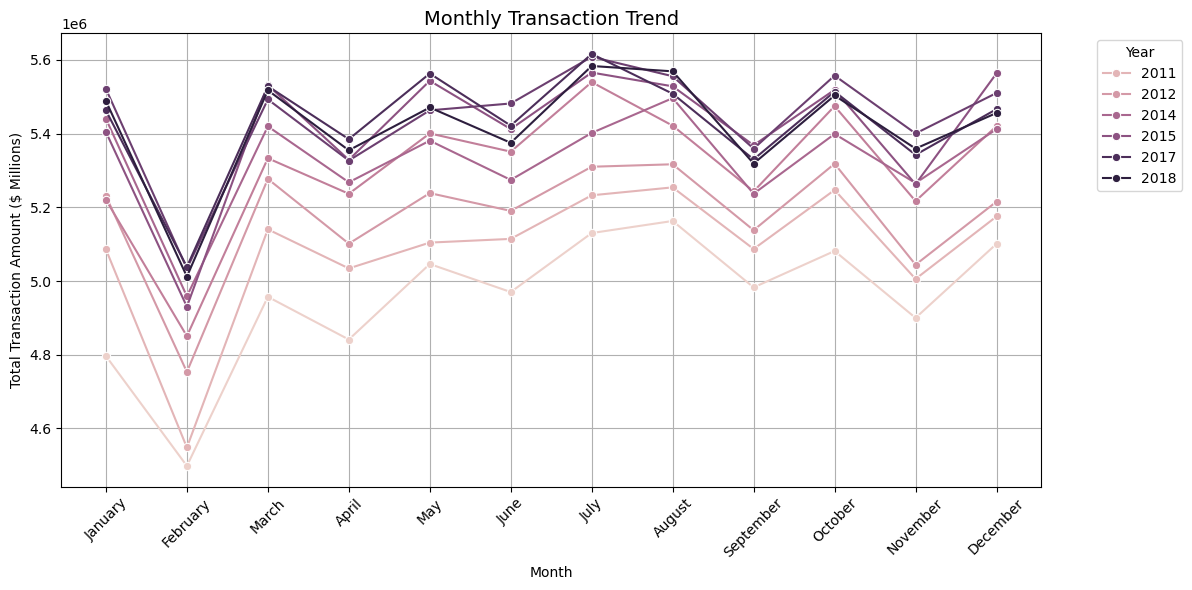

In [458]:
# 1. Ensure datetime is correct
merged3_df['date_time'] = pd.to_datetime(merged3_df['date_time'])
merged3_df['Year'] = merged3_df['date_time'].dt.year
merged3_df['month_name'] = merged3_df['date_time'].dt.month_name()

# 2. Exclude 2019 data
filtered_df = merged3_df[merged3_df['Year'] != 2019].copy()

# 3. Ensure month ordering
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
filtered_df['month_name'] = pd.Categorical(filtered_df['month_name'], categories=month_order, ordered=True)

# 4. Group by Year and Month
monthly_yearly_total = filtered_df.groupby(['Year', 'month_name'])['transaction_amount'].sum().reset_index()

# 5. Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_yearly_total, x='month_name', y='transaction_amount', hue='Year', marker='o')

plt.title('Monthly Transaction Trend', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount ($ Millions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


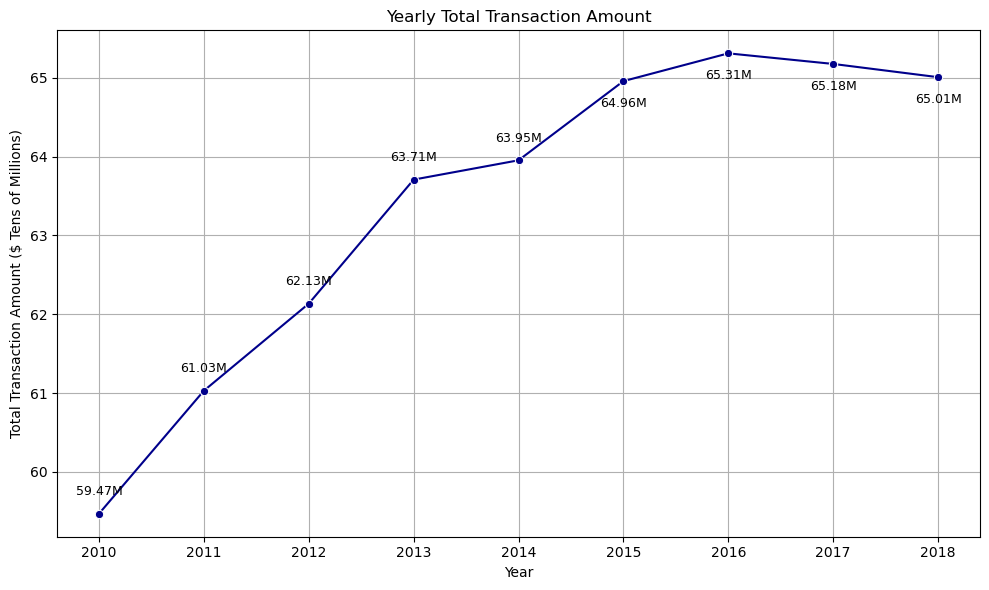

In [459]:
# Plot Line Chart
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_total, x='Year', y=yearly_total['transaction_amount'] / 1e6, marker='o', color='darkblue')

plt.title('Yearly Total Transaction Amount')
plt.xlabel('Year')
plt.ylabel('Total Transaction Amount ($ Tens of Millions)')
plt.grid(True)

# Add Value Labels — Conditional Positioning
for i, row in yearly_total.iterrows():
    year = row['Year']
    amount_mil = row['transaction_amount'] / 1e6
    
    if year >= 2015:
        # Place below the line
        plt.text(year, amount_mil - 0.2, f"{amount_mil:.2f}M", 
                 ha='center', va='top', fontsize=9, color='black')
    else:
        # Place above the line
        plt.text(year, amount_mil + 0.2, f"{amount_mil:.2f}M", 
                 ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_10188\2578151520.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=merged3_df, x='num_credit_cards', y='debt_to_income_ratio', palette='coolwarm')


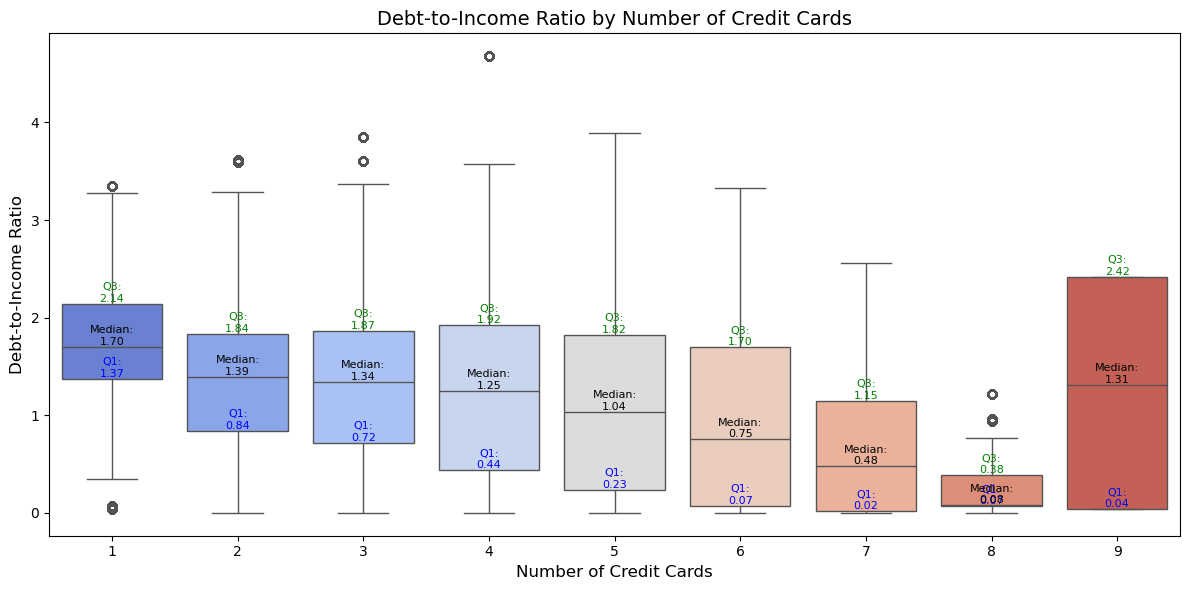

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=merged3_df, x='num_credit_cards', y='debt_to_income_ratio', palette='coolwarm')

# Annotate Q1, Median, Q3 for each number of credit cards
for i, card_num in enumerate(sorted(merged3_df['num_credit_cards'].unique())):
    values = merged3_df[merged3_df['num_credit_cards'] == card_num]['debt_to_income_ratio']
    q1 = values.quantile(0.25)
    median = values.median()
    q3 = values.quantile(0.75)

    # Label Q1
    ax.text(i, q1, f'Q1:\n{q1:.2f}', ha='center', va='bottom', fontsize=8, color='blue')

    # Label Median
    ax.text(i, median, f'Median:\n{median:.2f}', ha='center', va='bottom', fontsize=8, color='black')

    # Label Q3
    ax.text(i, q3, f'Q3:\n{q3:.2f}', ha='center', va='bottom', fontsize=8, color='green')

# Titles and layout
plt.title('Debt-to-Income Ratio by Number of Credit Cards', fontsize=14)
plt.xlabel('Number of Credit Cards', fontsize=12)
plt.ylabel('Debt-to-Income Ratio', fontsize=12)
plt.tight_layout()
plt.show()



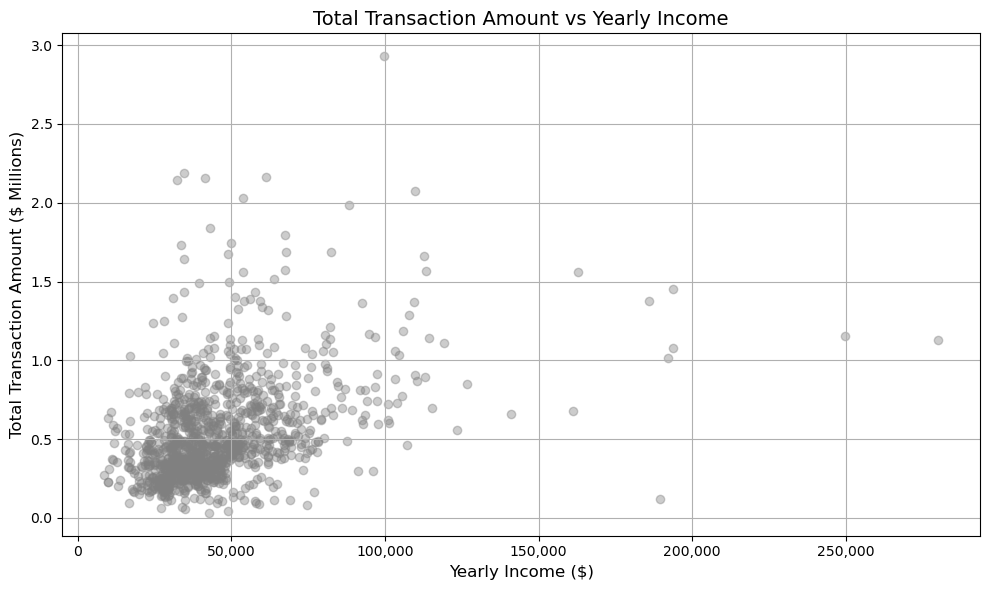

In [494]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 1. Group by Yearly Income — Sum of Transaction Amount
income_spending_df = merged3_df.groupby('yearly_income')['transaction_amount'].sum().reset_index()

# 2. Plot Scatter 
plt.figure(figsize=(10, 6))
plt.scatter(income_spending_df['yearly_income'], income_spending_df['transaction_amount'] / 1e6,
            color='grey', alpha=0.4)

# 3. Format x-axis with comma separators
plt.gca().get_xaxis().set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# 4. Chart Aesthetics
plt.title('Total Transaction Amount vs Yearly Income', fontsize=14)
plt.xlabel('Yearly Income ($)', fontsize=12)
plt.ylabel('Total Transaction Amount ($ Millions)', fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.show()


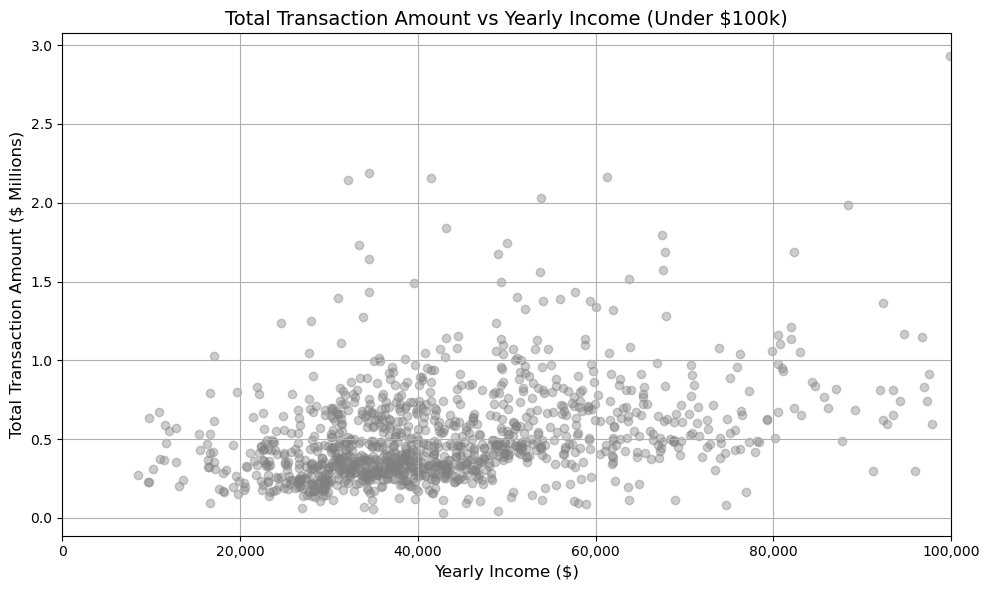

In [501]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 1. Group by Yearly Income — Sum of Transaction Amount
income_spending_df = merged3_df.groupby('yearly_income')['transaction_amount'].sum().reset_index()

# 2. Plot Scatter 
plt.figure(figsize=(10, 6))
plt.scatter(income_spending_df['yearly_income'], income_spending_df['transaction_amount'] / 1e6,
            color='grey', alpha=0.4)

# 3. Format x-axis with comma separators
plt.gca().get_xaxis().set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# 4. Chart Aesthetics
plt.title('Total Transaction Amount vs Yearly Income (Under $100k)', fontsize=14)
plt.xlabel('Yearly Income ($)', fontsize=12)
plt.ylabel('Total Transaction Amount ($ Millions)', fontsize=12)
plt.grid(True)

# 5. Limit x-axis to $100,000
plt.xlim(0, 100000)

plt.tight_layout()
plt.show()


## 5️⃣ Data Insights

- Online transactions is the most popular type of payment throughout all age group especially among the group A & B twenties and thirties. Which followed by swipe transcations then chip transcation.
- Transaction amount throughtout the week fluctuate can see that on Wednesday people spend less on and peak on Saturday. If we separate into age group the highest transaction are group B, the people in their thirties and group F the seventies transact the less. Usually one age group are in their own boundary of total transaction but group A & D interwine the twenties and fourties.
- Income class shows that usually the low-mid class tend to spend a lot of times hinting multiple purchases. Giving insight that the high class don't spend as much or a lot. 
- Monthly trends shows that from 2010 to 2018 Feb was the worst performer in total transaction amount possible due to after the Holiday people transact less. July is usually the highest level of total transaction possible holidays are Independence Day for the US. 
- The Total transaction amount from 2010 to 2018 has raise significantly till 2016 about a 6 million USD increase in transaction and is slowly cooling down as 2017 and 2018 as seen a drop in transactions.
- The boxplot shows a interesting infomation that usually people with credit are responsible as their debt to income ratio are lower. To clarify the debt is the amount of money they took a loan from but the income is based per year even if the ratio is more than 1 showing that people are in debt but yearly income doesn't equal networth.
- Most users earning 20k–60k USD annually transacted 200k–800k USD over 2010–2018, reflecting consistent long-term spending. The higher someone earn doesn't mean that they will transact more into the economy. Even though there are a few outlier like a yearly income of 100,000 USD spending near 3 million USD in transactions.

As a business perspective businesses should make sure their websites and apps are easy and safe to use. Companies should focus ads, products, and promotions on the age group A & B. Focus time, sales and offers during Saturday & July. Focus on the middle income users as their like to spend the most those that earn around 40,000 USD yearly. Avoid too many premium offers for high income as the rentention might not be there.
Currently there is no worry the economic market during this time therefore business can invest to target key users but be aware of upcoming disaster
Target people with credit card as they tend to spend regardless of income, the more the credit card the better are would transact as less focus on paying back debt and more focus on spending.
